# Quantitative Comparison

Pada materi-materi sebelumnya telah di perkenalkan tentang pondasi-pondasi visualisasi. Dari sekarang dan ke depan materi akan lebih advance lagi, pertama akan di perkenalkan beberapa bentuk visualisasi lainnya (sebelumnya telah di pelajari lineplot), kemudian akan di tunjukan kegunaannya untuk perbandingan kuantitatif.

Langsung saja. beberapa bentuk visualisasi yang akan di perkenalkan adalah :

Bar Chart
Scatter Plot
Histogram
Akan di gunakan data tentang penjualan video games dalam satuan juta dollar, yang mana filenya bisa di download disini.

In [1]:
import pandas as pd

df = pd.read_csv('vgsales.csv')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

# Pengenalan Beberapa Bentuk Visualisasi

## Bar Chart

Bar chart bisa di buat dengan method bar. Bar chart berguna untuk memvisualisasikan frekuensi kejadian suatu data berdasarkan suatu kategori. Jadi, bar chart ini di visualisasikan untuk membandingkan data yang bertipe kategori. Bar chart berguna bila jumlah kategori tidak lebih dari 30 pada umumnya. Apabila lebih dari itu, biasanya bar chart akan menjadi kacau sehingga data sulit untuk di interpretasi.

Berikut contoh sederhana dari visualisasi bar chart:

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6040\2704228279.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category, rotation=90)


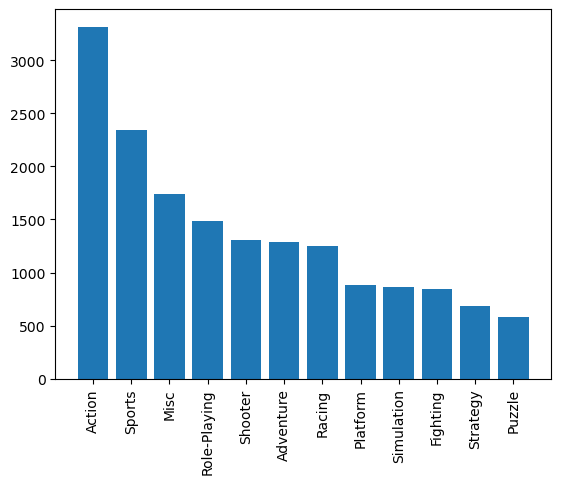

In [2]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

# read data vgsales
df = pd.read_csv('vgsales.csv')

# extract data tentang banyaknya setiap jenis genre dalam data
data = df['Genre'].value_counts()
category = data.index
frequency = data.values

# plot data
fig, ax = plt.subplots()
ax.bar(category, frequency)
ax.set_xticklabels(category, rotation=90)
plt.show()

Dari gambar di atas dapat di lihat bahwa data ini memiliki paling banyak data video games dengan genre Action, kemudian Sport, dan seterusnya.

Method set_xticklabels() adalah untuk mengontrol komponen label data di sumbu x. di berikan label nya dengan data category, dan di putar sebesar 90 derajat agar label tidak bertumpuk.

Pada bahasan selanjutnya akan di tunjukan improvisasi terhadap visualisasi ini.

## Scatter Plot

Scatter plot berguna untuk melakukan perbandingan data antara data bertipe numerik. untuk melakukan visualisasi scatter plot bisa dilakukan menggunakan method scatter().

Contoh akan di visualisasikan dengan scatter plot data tentang penjualan semua video games di jepang dan Europa.

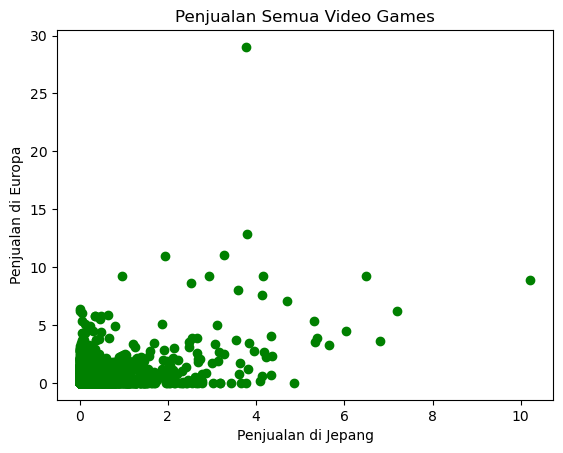

In [3]:
fig, ax = plt.subplots()

# pembuatan plot
ax.scatter(df['JP_Sales'], df['EU_Sales'], c='g')

# axis labeling
ax.set_xlabel('Penjualan di Jepang')
ax.set_ylabel('Penjualan di Europa')
ax.set_title('Penjualan Semua Video Games')

plt.show()

## Histogram

Histogram mempunyai kemiripan dengan bar chart, beberapa keliru memahami bahwa bar chart sama dengan histogram. Kunci dari perbedaannya adalah Histogram untuk memvisualisasikan distribusi data dari suatu data bertipe numerik dan continues. sedangan bar chart untuk memvisualisasikan data bertipe kategori.

Misalkan ingin mengetahui perbedaan distribusi penjualan video games di seluruh dunia untuk game bergenre Action dan Sport. Berikut adalah contoh visualisasi dari Histogram nya :

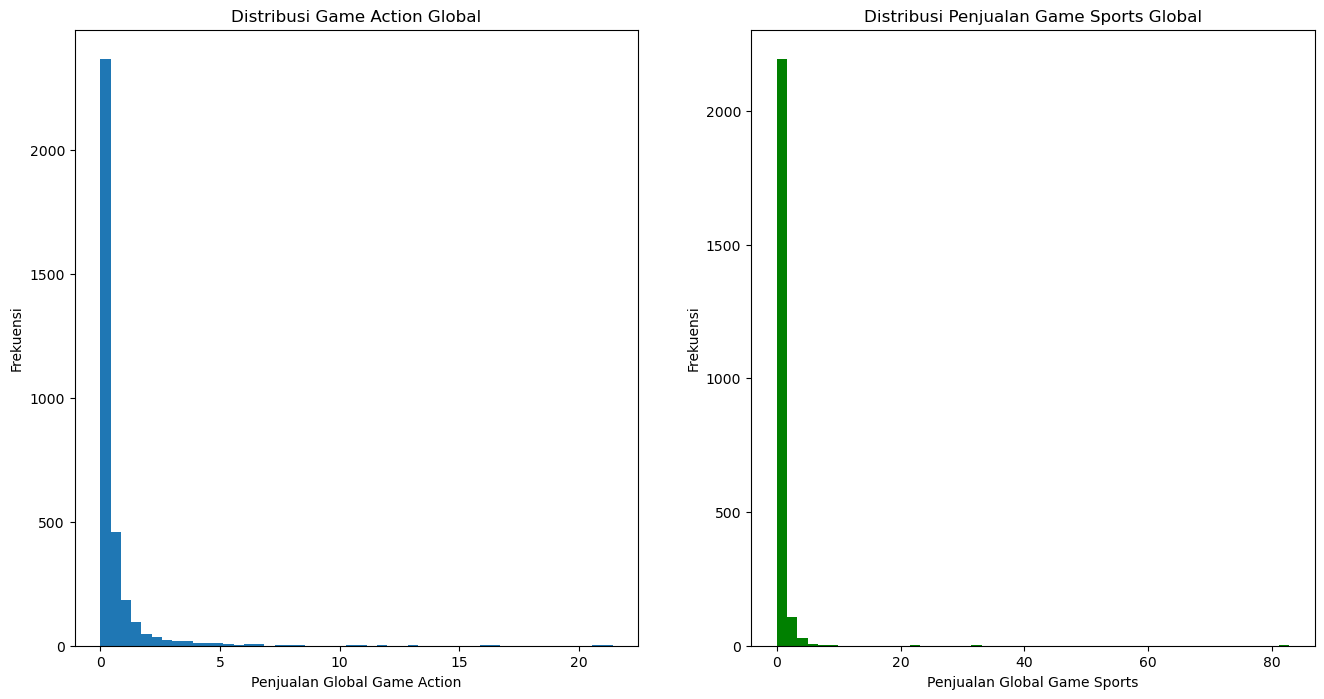

In [4]:
action = df[df['Genre']=='Action']['Global_Sales']
sport = df[df['Genre']=='Sports']['Global_Sales']

fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

ax[0].hist(action, bins=50)
ax[0].set_xlabel('Penjualan Global Game Action')
ax[0].set_ylabel('Frekuensi')
ax[0].set_title('Distribusi Game Action Global')

ax[1].hist(sport, bins=50, color='g')
ax[1].set_xlabel('Penjualan Global Game Sports')
ax[1].set_ylabel('Frekuensi')
ax[1].set_title('Distribusi Penjualan Game Sports Global')

plt.show()

## Stacked Bar Chart

Stacked Bar Chart digunakan untuk membandingkan total value pada bebrapa kategori, seperti contoh kita akan menggunakan dataset Iris:

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Iris.csv', index_col=0)
df_group = df.groupby('Species').mean()
df_group.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026

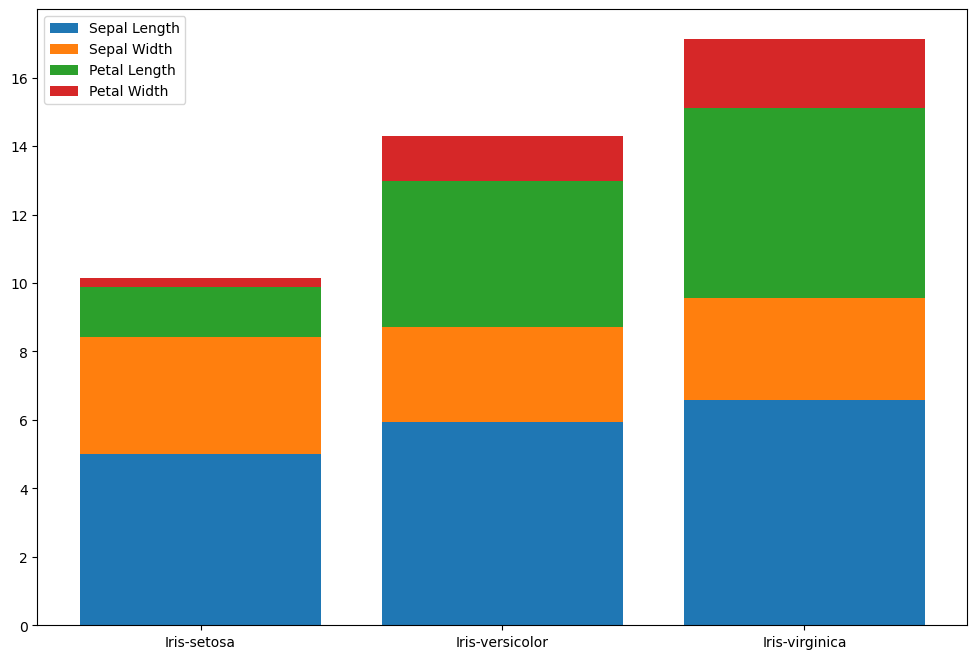

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df_group.index, df_group['SepalLengthCm'], label='Sepal Length')
ax.bar(df_group.index, df_group['SepalWidthCm'], bottom=df_group['SepalLengthCm'], label='Sepal Width')
ax.bar(df_group.index, df_group['PetalLengthCm'], bottom=df_group['SepalLengthCm']+df_group['SepalWidthCm'], label='Petal Length')
ax.bar(df_group.index, df_group['PetalWidthCm'], bottom=df_group['SepalLengthCm']+df_group['SepalWidthCm']+df_group['PetalLengthCm'], label='Petal Width')
plt.legend()
plt.show()

## Pie Plot

Pie plot digunakan untuk kita melihat perbandingan setiap data (umumnya dalam persen). Dengan menggunakan dataset iris diatas. kita bisa menunjukkan nilai membandingkan bagian sepal_length berdasarkan sepsies. seperti berikut:

In [7]:
plt.pie(df_group['sepal_length'], labels=df_group.index, autopct='%1.1f%%');

KeyError: 'sepal_length'

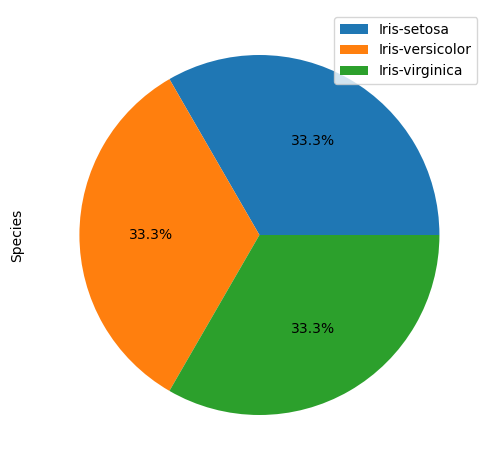

In [8]:
df['Species'].value_counts().plot.pie(autopct='%1.1f%%',labels=None,legend=True)
plt.tight_layout()

## Statistical Plot

Statistical plot digunakan untuk melihat grafik statistik data. Kita akan coba melakukan statistical plot data Iris menggunakan bar chart dengan melakukan plot central tendency dan sebaran data dalam unit standar deviasi.

In [9]:
df_mean = df.mean()
df_mean

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6040\4125945695.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean = df.mean()


SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6040\2660526071.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.bar(df_mean.index[i], df_mean.values[i], yerr=df.std()[i])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6040\2660526071.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.bar(df_mean.index[i], df_mean.values[i], yerr=df.std()[i])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6040\2660526071.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.bar(df_mean.index[i], df

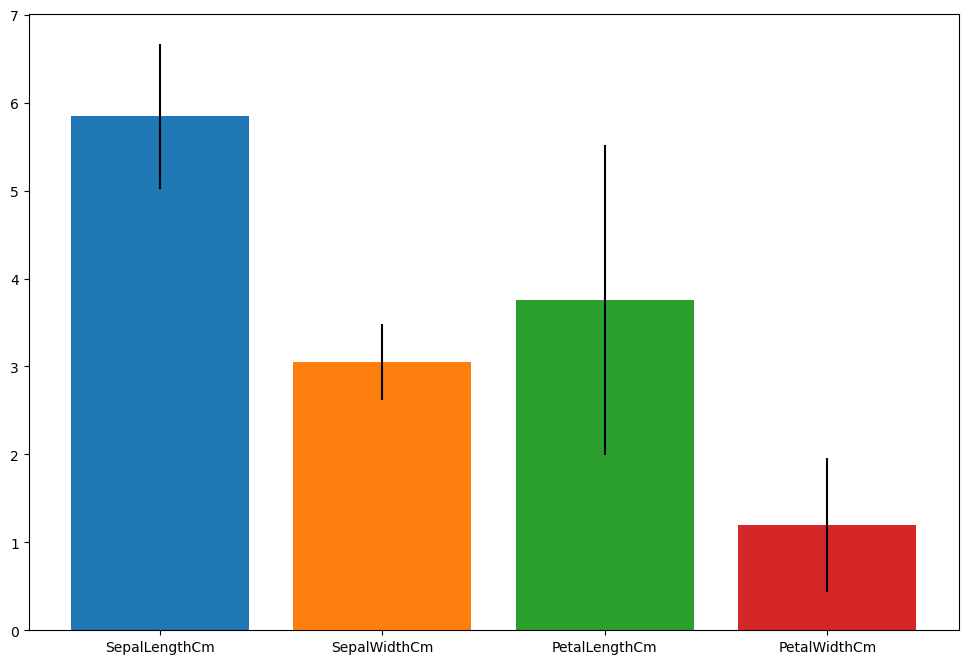

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

for i in range(len(df_mean)):
    ax.bar(df_mean.index[i], df_mean.values[i], yerr=df.std()[i])

plt.show()

Gambar diatas menunjukkan bahwa bar chart merepresentasikan central tendency berupa nilai mean dari data Iris sedangkan garis hitam menunjukkan standar deviasi dari data tersebut. Petal Length memiliki sebaran data yang paling lebar sedangkan Sepal Width memiliki sebaran data yang paling kecil, artinya distribusi Sepal Width terpusat d satu titik tidak begitu menyebar.

## Materi Video
[scatter plot](https://www.youtube.com/watch?v=eU2eUohmjkI&ab_channel=Sanbercode) <br>
[barchart](https://www.youtube.com/watch?v=yQ5htezlrkU&ab_channel=Sanbercode)

## Scatter Plot

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## plot biasa

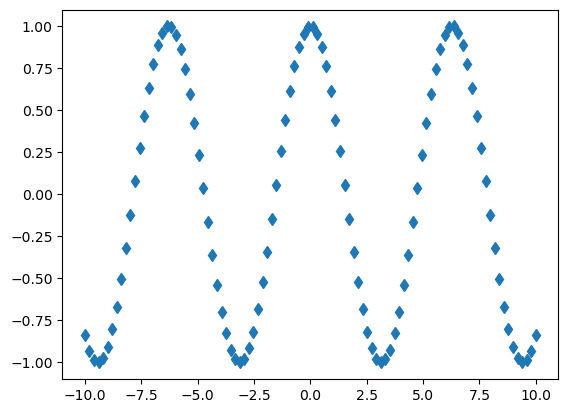

In [12]:
x = np.linspace(-10,10,100)
cos = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, cos, marker='d', linestyle='None')
plt.show()

## buat dengan scatter

penggunaan scatter akan lebih expert karana bisa memasukkan parameter2 lain, seperti argumen size(s), 

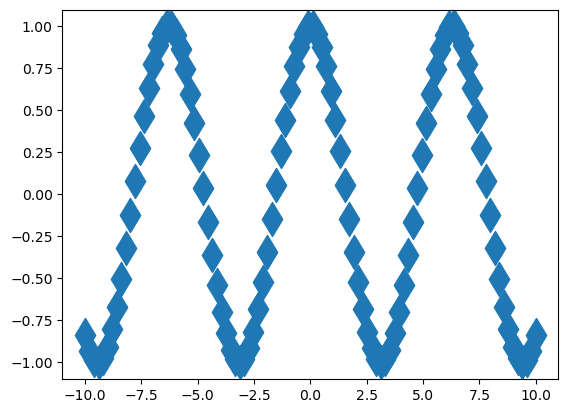

In [13]:
fig, ax = plt.subplots()
ax.scatter(x, cos, marker='d', s=300) #d=diamond
plt.show()

## contoh lain

In [14]:
i = np.random.RandomState(20)
x = i.rand(100)
y = i.rand(100)
colors = i.rand(100)
sizes = i.rand(100)*1000

In [15]:
x  #y , colors, sizes

array([0.5881308 , 0.89771373, 0.89153073, 0.81583748, 0.03588959,
       0.69175758, 0.37868094, 0.51851095, 0.65795147, 0.19385022,
       0.2723164 , 0.71860593, 0.78300361, 0.85032764, 0.77524489,
       0.03666431, 0.11669374, 0.7512807 , 0.23921822, 0.25480601,
       0.85762553, 0.94977903, 0.56168686, 0.17878052, 0.77025193,
       0.49238104, 0.63125307, 0.83949792, 0.4610394 , 0.49794007,
       0.67941112, 0.65078591, 0.26879524, 0.06732467, 0.77144514,
       0.48098413, 0.32920641, 0.51064106, 0.26362883, 0.31051155,
       0.62685344, 0.55744981, 0.31857956, 0.39484322, 0.25797459,
       0.58224112, 0.16162871, 0.59813382, 0.82582358, 0.15639172,
       0.73430052, 0.40864343, 0.7786879 , 0.80397057, 0.78607144,
       0.59228702, 0.6644892 , 0.64656729, 0.42563648, 0.51356833,
       0.50125784, 0.03708381, 0.7081161 , 0.6204306 , 0.77780853,
       0.45940947, 0.37980555, 0.2918922 , 0.55722886, 0.0841636 ,
       0.63128167, 0.94457049, 0.89123753, 0.87858258, 0.34475

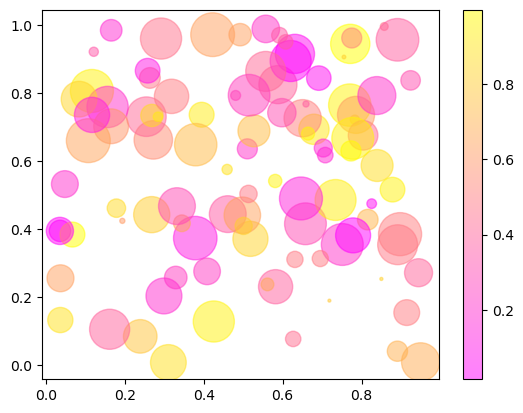

In [16]:
fig, ax = plt.subplots()
scatter = ax.scatter(x, y,c=colors, s=sizes, alpha=0.5, cmap='spring') #alpha=transparancy , cmap=tema

#buat legenda dari warna
fig.colorbar(scatter)
plt.show()

## Bar Plot

### BarPlot berulang

In [17]:
df = pd.read_csv('diamonds.csv')
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

### coba bandingkan kolom depth dan table
karena nilai datanya berdekatan(dari 61 ke 55), lalu grouping berdasaarkan kolom cut

In [18]:
group = df.groupby('cut')[['depth', 'table']].mean()
group

depth      table
cut                            
Fair       64.041677  59.053789
Good       62.365879  58.694639
Ideal      61.709401  55.951668
Premium    61.264673  58.746095
Very Good  61.818275  57.956150

daari data var grup, akan dibuat barplot

- nanti akan ada 5 kategori sumbu x(fair,good-very good)
- setiap bagian dari sumbu x akan memiliki 2 barplot, depth dan table

In [19]:
#insiasi sumbu x 
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

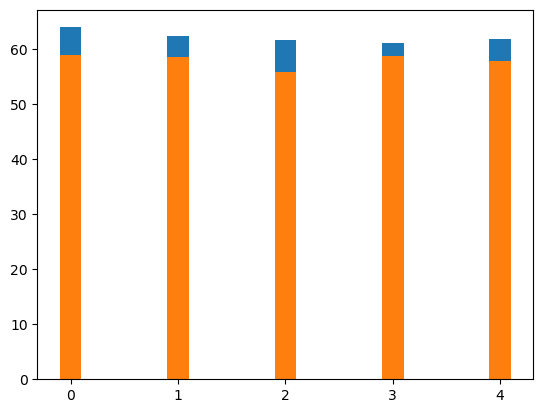

In [20]:
x = np.arange(5)
#inisiasi sumbu y
y = group['depth']
y2 = group['table']

fig, ax = plt.subplots()
ax.bar(x,y,width=0.2)
ax.bar(x,y2,width=0.2)
plt.show()

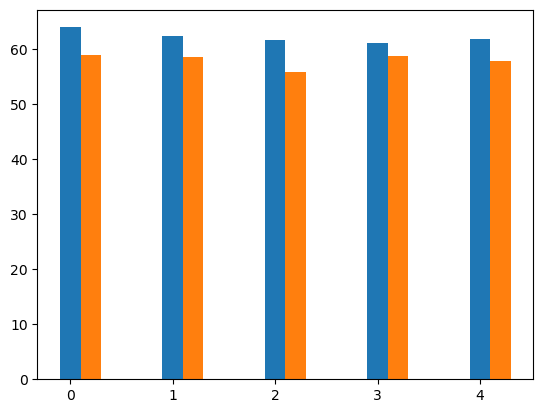

In [21]:
x = np.arange(5)
#inisiasi sumbu y
y = group['depth']
y2 = group['table']

fig, ax = plt.subplots()
ax.bar(x,y,width=0.2)
#memberi jarak
ax.bar(x+0.2,y2,width=0.2)
plt.show()

### mengubah x label

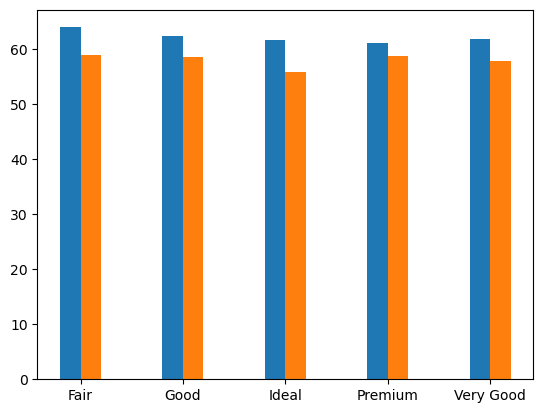

In [22]:
x = np.arange(5)
#inisiasi sumbu y
y = group['depth']
y2 = group['table']

fig, ax = plt.subplots()
ax.bar(x,y,width=0.2)
#memberi jarak
ax.bar(x+0.2,y2,width=0.2)
plt.xticks(x+0.1, labels=group.index) #mengubah x label
plt.show()

### membuat barchart, tapi yg menjadi klasifikasi adalah depth dan table

In [23]:
group = df.groupby('cut')[['depth', 'table']].mean()
group

depth      table
cut                            
Fair       64.041677  59.053789
Good       62.365879  58.694639
Ideal      61.709401  55.951668
Premium    61.264673  58.746095
Very Good  61.818275  57.956150

#### dengan melakukan transpose

In [24]:
group_trans = group.transpose()
group_trans

cut         Fair       Good      Ideal    Premium  Very Good
depth  64.041677  62.365879  61.709401  61.264673  61.818275
table  59.053789  58.694639  55.951668  58.746095  57.956150

### ketika ada banyak barplot pd 1 kelompok, maka bisa menuliskan 1 per 1

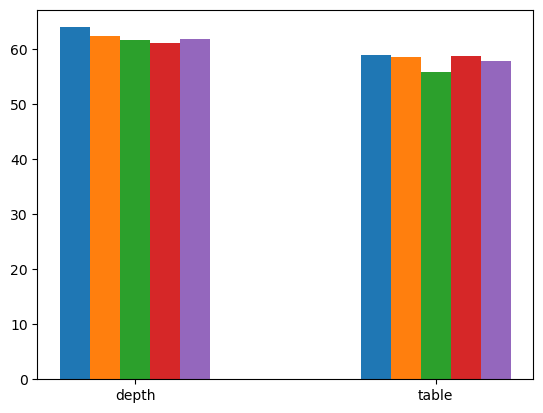

In [25]:
x = np.arange(2)
y = group_trans['Fair']
y2 = group_trans['Good']
y3 = group_trans['Ideal']
y4 = group_trans['Premium']
y5 = group_trans['Very Good']

width = 0.1
fig, ax = plt.subplots()

ax.bar(x, y, width=width)
ax.bar(x+width, y2, width=width)
ax.bar(x+(width*2), y3, width=width)
ax.bar(x+(width*3), y4, width=width)
ax.bar(x+(width*4), y5, width=width)

plt.xticks(x+0.2, labels=group_trans.index) #mengubah x label
plt.show()

In [26]:
group = df.groupby('cut')[['depth', 'table']].mean()
group

depth      table
cut                            
Fair       64.041677  59.053789
Good       62.365879  58.694639
Ideal      61.709401  55.951668
Premium    61.264673  58.746095
Very Good  61.818275  57.956150

In [27]:
group_trans = group.transpose()
group_trans

cut         Fair       Good      Ideal    Premium  Very Good
depth  64.041677  62.365879  61.709401  61.264673  61.818275
table  59.053789  58.694639  55.951668  58.746095  57.956150

### Gunakan cara lebih efisien dengan LOOPING

In [28]:
for i, j in enumerate(group_trans.columns): #mengambilkolom dari df group trans, lalu di enumerate(mengambil nama index dan nama kolom)
    print(i)
    print(j)

0
Fair
1
Good
2
Ideal
3
Premium
4
Very Good


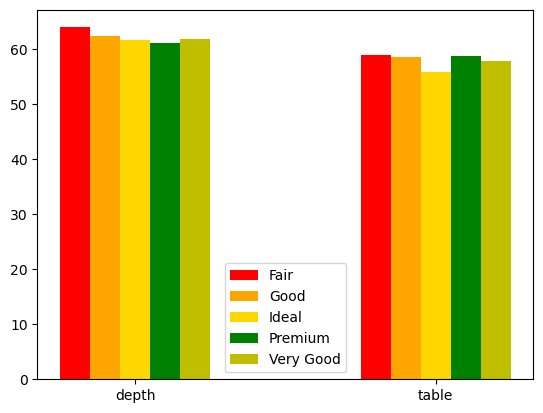

In [34]:
fig, ax = plt.subplots()

width = 0.1
colors=['r','orange','gold', 'green', 'y']

for i, j in enumerate(group_trans.columns): 
    ax.bar(x+(width*i), group_trans[j], width=width, label=j, color=colors[i]) #sumbu y nya tinggal panggil data dari kolom yg akan dilakukan bar
    
plt.legend()
plt.xticks(x+0.2, labels = group_trans.index) #meratakan label x axs0
plt.show()